In [35]:
%matplotlib inline

# Anvendelser

## Modellering av populasjonsvekst

I et økosystem med bæreevne $R$ og malthusparameter $\alpha$ vil en populasjonsvekst ofte kunne
modelleres med differensiallikningen

$$ u'(t) = \alpha u(t)\left(1 + \frac{u(t)}{R}\right), \;\;\; u(0) = U_0 $$

## Skalert versjon

##### Skaleringskonstanter
\begin{align*}
v & = \frac{u}{u_c}, \;\;\;\;  \tau = \frac{t}{t_c}  \;\;\;\; \text{ skaleringskonstanter } \;u_c \;\text{ og }\; t_c \\[1.5em]
u_c & = R \;\text{ og }\; t_c = \alpha^{-1} \Longleftrightarrow u = Rv \;\text{ og }\; \tau = \alpha t \\[1.5em]
\end{align*}

##### Skalert likning:
\begin{align*}
\frac{\text{d}v}{\text{d}{\tau}} & = v(1 - v), \;\;\;\; v(0) = \frac{U_0}{R} \\[1.5em]
u(t) & = Rv(\alpha t) \;\;\;\;\; \text{ gjenskapelse av }\; u \;\text{ fra }\; v
\end{align*}

## Formulering av algoritme for å løse likningen
Vi skal tilnærme en løsning til likningen 
$$ \frac{\text{d}\; v}{\text{d}\;{\tau}} = v(1 - v), \;\;\;\;\;\;\; v(0) = \frac{U_0}{R} $$

på et diskret grid $\left(t_0 = 0, \Delta t, 2\Delta t, \dots T - \Delta t, t_N = T\right) \subset [0, T]$

### 1. Diskretiser definisjonsmengden.
Vi velger ofte $\Delta t$ og $T$ som parametere. Vi får da

\begin{align*}
N & = \left \lceil \frac{T}{\Delta t} \right \rceil \\
D & = (0, \Delta t, 2\Delta t, \dots, T - \Delta t, T) = (n\Delta t)_{n = 0}^{N}
\end{align*}

Ellers må diskretiseringen $D$ bestemmes på annen måte, og $N$ telles ut fra $D$.

### 2. Evaluer likningen på gridet

\begin{align*}
\frac{\text{d } v(t_n)}{\text{d } \tau} = v(t_n)(1 - v(t_n))
\end{align*}

### 3. Tilnærm deriverte med endelige differanser
Bruker her forlengs differanse (Eulers metode). Merk $\Delta t = t_{n+1} - t_n$

\begin{align*}
\frac{v(t_{n + 1}) - v(t_n)}{\Delta t} \approx v(t_n)(1 - v(t_n))
\end{align*}

### 4. Erstatt tilnærmingen med endelige differenslikninger
Innfør tilnærming $y_n \approx v(t_{n+1})$

\begin{align*}
\frac{y_{n + 1} - y_n}{\Delta t} & = y_n(1 - y_n) \\[1.4em]
y_{n + 1} &= y_n + \Delta t y_n(1 - y_n)
\end{align*}

### 5. Formuler algoritme for å simulere problemet
pseudokode:
```
parametere dt, T, U_0, R
N = ceil(T/dt)
y0 = U_0/R
for i = 1, 2, 3, ..., N:
    y_neste = y + dt*y(1 - y)
    y = y_neste
```

### 6. Implementasjon

In [42]:
%%writefile logistic_scaled.py
import sys
from pylab import *


# les argumenter fra kommandolinja
dt = float(sys.argv[1])
T = float(sys.argv[2])
U_0 = float(sys.argv[3])
R = float(sys.argv[4])


N = int(ceil(T/dt))
t = linspace(0, T, N + 1)

y = U_0/R         # definer y0
y_verdier = [y]
for i in range(1, N + 1):
    y_neste = y + dt*y*(1 - y)
    y = y_neste
    y_verdier.append(y)

y_verdier = array(y_verdier)

plot(t, y_verdier)
fig = gcf()
fig.set_size_inches(8,5)
xlabel(r'$\tau$', fontsize=20)
ylabel(r'$v$', fontsize=20)
xticks(fontsize=16)
yticks(fontsize=16)
title('Logistisk vekst', fontsize=26)
grid()
show()



Overwriting logistic_scaled.py


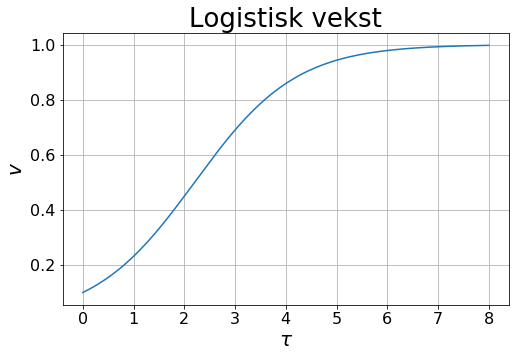

In [43]:
run logistic_scaled.py 0.01 8 1 10

## Læringsverdi?
* Oppdateringssteget `y_neste = y + dt*y*(1 - y)` gir ofte tilgang til veldig god forståelse av hvordan prosessen utvikler seg - som man ikke nødvendigvis får av å løse likningen for hånd.

* I dette tilfellet kunne vi finne en eksplisitt formel for oppdateringssteget. Det er ikke alltid mulig, man må noen ganger bruke f.eks newtons metode eller halveringsmetoden.

Problemet er "**enkelt**": Det finnes en formel for løsningen.

## Didaktisk:
Løsningssteget `y_neste = y + dt*y*(1 - y)` er kanskje en så opplagt kandidat for logistisk vekst at algoritmen kan innføres før elevene har hatt om differensiallikninger?

## Utvidelser
* Innføre tidsavhengig bæreevne $R$ (sesonger)
* Innføre rovdyr (system av differensiallikninger: predator-prey)
* Innføre overbeiting ($R$ blir mindre når $u > R$ over tid)

Felles for utvidelsene er at de er kompliserte eller umulige å løse med penn og papir.

## Kilder
* [1] Langtangen, H.P - *A primer on Scientific programming with Python*, 5. utg., Springer
* [2] Wolfram Alpha - *MathWorld - Logistic Equation*